In [1]:
from matplotlib import pyplot as plt
import numpy as np
import yfinance as yf
from scipy.fft import rfft, rfftfreq, irfft

df = yf.download("BTC-USD", interval="1d", period="5y")

[*********************100%***********************]  1 of 1 completed


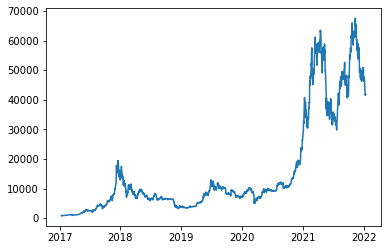

In [2]:
plt.plot(df["Open"])

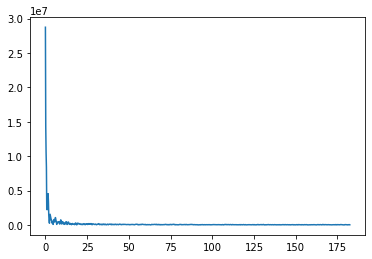

In [3]:
yf = rfft(df["Open"].values)
xf = rfftfreq(len(df),1/365)

plt.plot(xf, np.abs(yf))
plt.show()

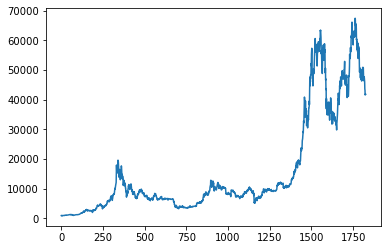

In [4]:
plt.plot(irfft(yf))

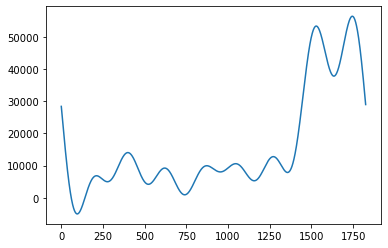

In [5]:
smooth = yf.copy()
smooth[int(len(smooth)*0.01):] = 0

plt.plot(irfft(smooth))

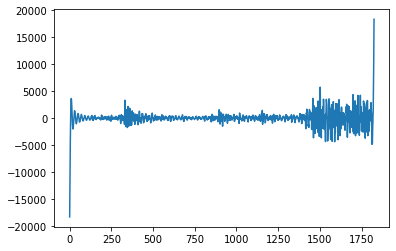

In [6]:
high_freq = yf.copy()
high_freq[:int(len(high_freq)*0.10)] = 0

plt.plot(irfft(high_freq))

The time-series appears more stationary now. Although we see there are still some very strong movements that roughly corespond to the time-periods explosive movements in the Bitcoin price.

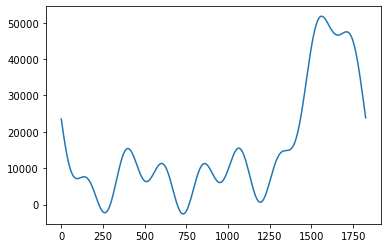

In [7]:
idx = np.argsort(np.abs(yf))[:-5]

smooth = yf.copy()
smooth[idx] = 0

plt.plot(irfft(smooth))

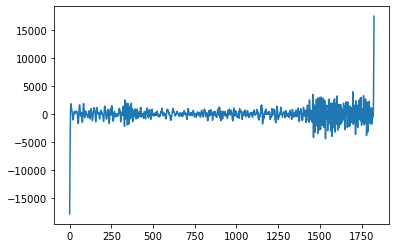

In [8]:
idx = np.argsort(np.abs(yf))[-int(len(high_freq)*0.10):]

high_freq = yf.copy()
high_freq[idx] = 0

plt.plot(irfft(high_freq))